# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [188]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [189]:
# read in readmissions data provided
hospital_read_df = pd.read_csv(r'C:\Users\hhtph\Desktop\cms_hospital_readmissions.csv')

In [190]:
hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16855,BERTRAND CHAFFEE HOSPITAL,330111,NY,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16856,CROWNPOINT HEALTHCARE FACILITY,320062,NM,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16858,GALLUP INDIAN MEDICAL CENTER,320061,NM,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16859,UNIVERSITY OF LOUISVILLE HOSPITAL,180141,KY,READM-30-HIP-KNEE-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [191]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df['Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(float)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
print (clean_hospital_read_df['Number of Discharges'])
clean_hospital_read_df['Excess Readmission Ratio'].fillna(0.0).astype(float)

16857       0.0
14582       0.0
15606       0.0
15615       0.0
14551       0.0
15625       0.0
15642       0.0
15648       0.0
15652       0.0
15396       0.0
14515       0.0
15682       0.0
14436       0.0
15697       0.0
14428       0.0
15703       0.0
15765       0.0
14418       0.0
14393       0.0
15679       0.0
14825       0.0
14618       0.0
15288       0.0
14877       0.0
14896       0.0
14949       0.0
14799       0.0
14989       0.0
14764       0.0
15069       0.0
          ...  
7147     2042.0
897      2060.0
13326    2089.0
7872     2106.0
9444     2112.0
13723    2189.0
1605     2190.0
12910    2196.0
2758     2198.0
7934     2209.0
1352     2278.0
3042     2314.0
1448     2318.0
2846     2341.0
8249     2353.0
3202     2388.0
13730    2393.0
2440     2430.0
11545    2469.0
1805     2476.0
8818     2509.0
572      2565.0
136      2581.0
1698     2596.0
1242     2705.0
8126     2716.0
6643     2740.0
1892     3570.0
13615    3980.0
13666    6793.0
Name: Number of Discharg

C:\Users\hhtph\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


16857    0.0000
14582    0.0000
15606    0.0000
15615    0.0000
14551    0.0000
15625    0.0000
15642    0.0000
15648    0.0000
15652    0.0000
15396    0.0000
14515    0.0000
15682    0.0000
14436    0.0000
15697    0.0000
14428    0.0000
15703    0.0000
15765    0.0000
14418    0.0000
14393    0.0000
15679    0.0000
14825    0.0000
14618    0.0000
15288    0.0000
14877    0.0000
14896    0.0000
14949    0.0000
14799    0.0000
14989    0.0000
14764    0.0000
15069    0.0000
          ...  
7147     0.9935
897      1.1358
13326    0.8384
7872     0.9839
9444     0.9627
13723    0.6350
1605     1.0991
12910    0.8747
2758     1.0663
7934     0.9831
1352     1.1099
3042     1.0605
1448     1.1055
2846     1.0647
8249     0.9788
3202     1.0571
13730    0.5495
2440     1.0738
11545    0.9248
1805     1.0925
8818     0.9712
572      1.1637
136      1.2577
1698     1.0962
1242     1.1148
8126     0.9804
6643     1.0003
1892     1.0896
13615    0.7682
13666    0.7379
Name: Excess Readmission

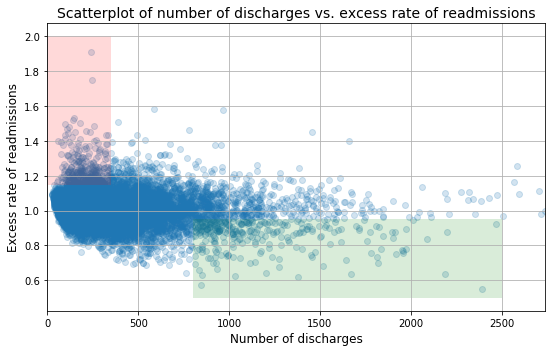

In [192]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Answer A.

Overall, rate of readmissions is trending down with increasing number of discharges

The plot shows that when the number of discharges exceed ~ 1000, the rate of readmission is less
frequent. That does not necessarily mean that there is a correlation between the number of discharges
and the rate of readmission. The plot shows that the majority of excess readmission rate occurs 
between 0 and 1000 discharges. Within this range of discharges, the data looks fairly evenly 
distributed between the excess readmission rates of 0.8 to 1.2 indicating a flat correlation.

With lower number of discharges, there is a greater incidence of excess rate of readmissions 
(area shaded red).

This would be true if the average number of readmission rates for numbers of discharges between
0 and 350 is greater than the average number of readmission rates for numbers of discharges between
350 and 700. It isn't clear just by looking at the plot that this is the case because the plotted 
points are so dense in this region that the individual number of data points can not be determined.
 
With higher number of discharges, there is a greater incidence of lower rates of readmissions 
(area shaded green).

While there are fewer points shown on the plot after 750 discharges, the trend between excess rate
of readmissions and discharges appears to be flat. So, the majority of rate of readmissions at larger
discharge rates remains between 0.8 and 1.2.


Text(0.5,1,'Scatterplot of number of discharges vs. excess rate of readmissions')

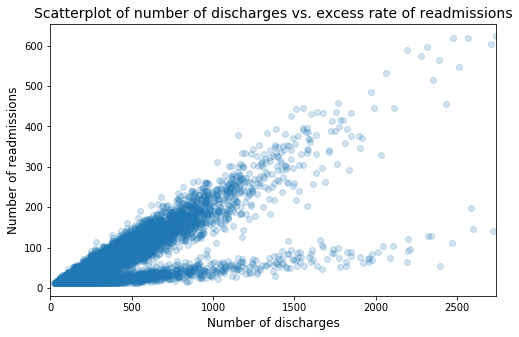

In [193]:
# Look at the number of discharges vs. the number of readmissions

x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Number of Readmissions'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Number of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)


The above plot shows the relationship between the number of discharges and readmissions. There are two linear trends, but both show that the higher the number of discharges a facility has will also see larger readmission rates.

In [194]:
#I have printed out the changed columns in the data frame. The Excess Readmission Ratio was changed
#such that any NaN values would be changed to 0.

print(clean_hospital_read_df['Excess Readmission Ratio'])
clean_hospital_read_df['Excess Readmission Ratio'].fillna(0.0, inplace = True)

print(clean_hospital_read_df['Excess Readmission Ratio'])



16857       NaN
14582       NaN
15606       NaN
15615       NaN
14551       NaN
15625       NaN
15642       NaN
15648       NaN
15652       NaN
15396       NaN
14515       NaN
15682       NaN
14436       NaN
15697       NaN
14428       NaN
15703       NaN
15765       NaN
14418       NaN
14393       NaN
15679       NaN
14825       NaN
14618       NaN
15288       NaN
14877       NaN
14896       NaN
14949       NaN
14799       NaN
14989       NaN
14764       NaN
15069       NaN
          ...  
7147     0.9935
897      1.1358
13326    0.8384
7872     0.9839
9444     0.9627
13723    0.6350
1605     1.0991
12910    0.8747
2758     1.0663
7934     0.9831
1352     1.1099
3042     1.0605
1448     1.1055
2846     1.0647
8249     0.9788
3202     1.0571
13730    0.5495
2440     1.0738
11545    0.9248
1805     1.0925
8818     0.9712
572      1.1637
136      1.2577
1698     1.0962
1242     1.1148
8126     0.9804
6643     1.0003
1892     1.0896
13615    0.7682
13666    0.7379
Name: Excess Readmission

In [195]:
clean_hospital_read_df2.tail(100)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
6247,ESSENTIA HEALTH ST MARYS,240101,MN,READM-30-PN-HRRP,97.0,NaN,1.0062,16.1,16.0,16.0,07/01/2010,06/30/2013
10183,DEKALB HEALTH,150045,IN,READM-30-HF-HRRP,97.0,NaN,0.9514,19.4,20.4,16.0,07/01/2010,06/30/2013
7346,HEALTHMARK REGIONAL MEDICAL CENTER,100081,FL,READM-30-COPD-HRRP,97.0,NaN,0.9909,22.4,22.6,21.0,07/01/2010,06/30/2013
5544,LAKEVIEW MEDICAL CENTER,520011,WI,READM-30-COPD-HRRP,97.0,NaN,1.0164,19.4,19.1,20.0,07/01/2010,06/30/2013
3823,BOURBON COMMUNITY HOSPITAL,180046,KY,READM-30-PN-HRRP,97.0,NaN,1.0445,15.9,15.3,18.0,07/01/2010,06/30/2013
9653,COMMUNITY WESTVIEW HOSPITAL,150129,IN,READM-30-HF-HRRP,97.0,NaN,0.9598,22.1,23.0,19.0,07/01/2010,06/30/2013
13456,NEBRASKA ORTHOPAEDIC HOSPITAL,280129,NE,READM-30-HIP-KNEE-HRRP,970.0,NaN,0.8201,3.6,4.3,31.0,07/01/2010,06/30/2013
11410,MERCY MEDICAL CENTER-DES MOINES,160083,IA,READM-30-COPD-HRRP,970.0,NaN,0.9280,18.9,20.4,178.0,07/01/2010,06/30/2013
6102,JERSEY SHORE UNIVERSITY MEDICAL CENTER,310073,NJ,READM-30-AMI-HRRP,971.0,NaN,1.0080,18.9,18.8,184.0,07/01/2010,06/30/2013
628,NEW YORK HOSPITAL MEDICAL CENTER OF QUEENS,330055,NY,READM-30-PN-HRRP,972.0,NaN,1.1562,20.0,17.3,203.0,07/01/2010,06/30/2013


Text(0.5,1,'Scatterplot of number of readmissions vs. excess rate of readmissions')

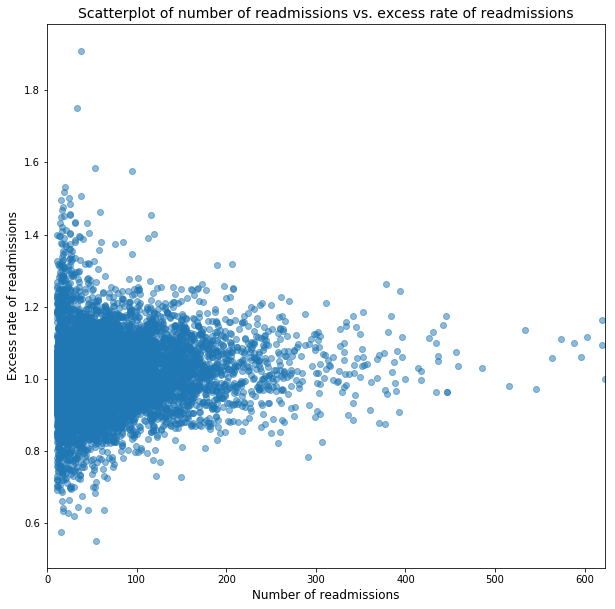

In [196]:
# The following plot was created to take a look at the relationship between the number of readmissions
# and the excess readmission ratio.

x = [a for a in clean_hospital_read_df['Number of Readmissions']]  [81:-3]
y = list(clean_hospital_read_df['Excess Readmission Ratio'])  [81:-3]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(x, y,alpha=0.5)

ax2.set_xlim([0, max(x)])
ax2.set_xlabel('Number of readmissions', fontsize=12)
ax2.set_ylabel('Excess rate of readmissions', fontsize=12)
ax2.set_title('Scatterplot of number of readmissions vs. excess rate of readmissions', fontsize=14)

In [197]:
clean_hospital_read_df['Excess Readmission Ratio'].mean()

1.00045525997581

In [198]:
# Change the number of discharges and the excess readmission ratio to be dtype float.

from scipy import stats
clean_hospital_read_df['Number of Discharges']=clean_hospital_read_df['Number of Discharges'].astype(float)

print (clean_hospital_read_df['Number of Discharges'])
clean_hospital_read_df['Excess Readmission Ratio'].astype(float)
print(clean_hospital_read_df['Excess Readmission Ratio'])


16857       0.0
14582       0.0
15606       0.0
15615       0.0
14551       0.0
15625       0.0
15642       0.0
15648       0.0
15652       0.0
15396       0.0
14515       0.0
15682       0.0
14436       0.0
15697       0.0
14428       0.0
15703       0.0
15765       0.0
14418       0.0
14393       0.0
15679       0.0
14825       0.0
14618       0.0
15288       0.0
14877       0.0
14896       0.0
14949       0.0
14799       0.0
14989       0.0
14764       0.0
15069       0.0
          ...  
7147     2042.0
897      2060.0
13326    2089.0
7872     2106.0
9444     2112.0
13723    2189.0
1605     2190.0
12910    2196.0
2758     2198.0
7934     2209.0
1352     2278.0
3042     2314.0
1448     2318.0
2846     2341.0
8249     2353.0
3202     2388.0
13730    2393.0
2440     2430.0
11545    2469.0
1805     2476.0
8818     2509.0
572      2565.0
136      2581.0
1698     2596.0
1242     2705.0
8126     2716.0
6643     2740.0
1892     3570.0
13615    3980.0
13666    6793.0
Name: Number of Discharg

In [199]:
from scipy import stats

stats.pearsonr(clean_hospital_read_df['Excess Readmission Ratio'],clean_hospital_read_df['Number of Discharges'])

(-0.0048921444200948549, 0.5986474732822149)

The Pearson correlation coefficient (-0.005), r, is small indicating that there is not a linear correlation between the excess readmission ratio and the number of discharges. The two tailed p-value (0.6) indicates that the correlation between the excess readmission ratio and the number of discharges is 0.

Calculate the confidence interval with alpha = 0.01

In [200]:
conf = np.percentile(clean_hospital_read_df['Excess Readmission Ratio'], [0.005,0.995])

In [201]:
print(conf)

[ 0.          0.72162496]


Statistical significance versus practical significance. Statistical significance infers that 
a probability of relationship between two variables exists. The practical significance implies 
existence of relationship between variables and real world scenario. Data that is statistically
significant may not be practically significant. Data that is practically significant is also 
statistically significant.

In [202]:
from scipy.stats import linregress
linregress(clean_hospital_read_df['Excess Readmission Ratio'],clean_hospital_read_df['Number of Discharges'])

LinregressResult(slope=-12.16840834512143, intercept=375.083345266903, rvalue=-0.004892144420094946, pvalue=0.59864747328096857, stderr=23.117988846145924)

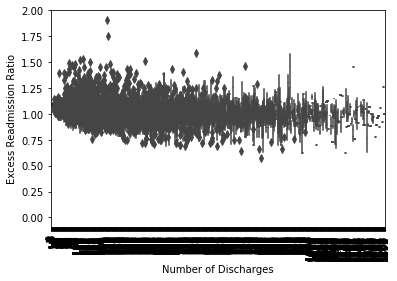

In [203]:
import seaborn as sns
g = sns.boxplot(clean_hospital_read_df['Number of Discharges'],clean_hospital_read_df['Excess Readmission Ratio'])
g.set_xticklabels(range(3000), rotation = 90)
plt.show()


In [204]:
I could not change the values on the x-axis to be legible.  I searched and tried at least a dozen things.

The above box plot shows the excess readmission ratio vs. the number of discharges. The box plot is a better representation of the relationship between the excess readmission ratio and the number of discharges. The box plot shows that as the number of discharges increases, the excess readmission ratio mean is greater than 1.00. The correlation is more pronounced with smaller number of discharges.

SyntaxError: invalid syntax (<ipython-input-204-782119e574bb>, line 1)

Regulatory policy recommendations:

1. Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

I agree with the above statement.

2. Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

I don't agree with the above statement. Consolidation of hospitals and facilities would likely cause 
hardship for disadvantaged patients because consolidated facilities would be likely be located further apart.